# Table of Contents
 <p><div class="lev1"><a href="#Implementing-BFS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementing BFS</a></div><div class="lev1"><a href="#Implementing-DFS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementing DFS</a></div>

# Implementing BFS

始点と終点が指定されたときに始点から終点に至るパスのうちの一つを求めるアルゴリズムを実装したい。Breadth First Search(BFS, 幅優先探索)を用いて実装できるらしいので、試してみる。

BFSの実装にはQueueというデータ構造を用いる。Pythonでは、dequeというデータ構造（stackとqueueを合わせたようなデータ構造）が提供されているので、それを用いる。

[このページ](http://www.ocw.titech.ac.jp/index.php?module=General&action=DownLoad&file=201602093-9183-1-11.pdf&type=cal&JWC=201602093)も参考になりそう。

>Given a graph $G$ and a starting vertex $s$, a breadth first search proceeds by exploring edges in the graph to find all the vertices in $G$ for which there is a path from $s$. The remarkable thing about a breadth first search is that it finds all the vertices that are a distance $k$ from ss before it finds any vertices that are a distance $k+1$. (http://interactivepython.org/runestone/static/pythonds/Graphs/ImplementingBreadthFirstSearch.html)

In [2]:
# dequeをimport
from collections import deque

In [3]:
# dequeのメソッドの確認

d = deque([1,2,3,4,5])
print (d)

# append: push/enqueueに対応
d.append(0)
print (d)

# pop: 右の要素を削除し、返す
print (d.pop())
print (d)

# popleft: 一番左の要素を削除し、返す
print (d.popleft())
print (d)

deque([1, 2, 3, 4, 5])
deque([1, 2, 3, 4, 5, 0])
0
deque([1, 2, 3, 4, 5])
1
deque([2, 3, 4, 5])


In [4]:
# NetworkXをインポート
import networkx as nx

In [40]:
G = nx.DiGraph()

In [41]:
G.add_edges_from([(1,2),(1,3),(1,4),(2,4),(2,5),(3,4),(4,5)])

In [9]:
import matplotlib.pyplot as plt

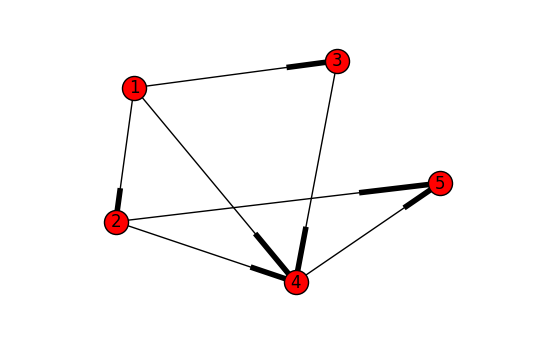

In [11]:
#試しに描画してみる
# Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G, k=5.)

# Draw labels for nodes and edges.
nx.draw_networkx_labels(G, pos)

# Finish drawing.
nx.draw(G, pos)

# Display with Matplotlib.
plt.axis('off')
plt.show()

In [42]:
G.successors(1)

[2, 3, 4]

In [62]:
def bfsPath(G, s, e):
    '''
    Inputs:
        G: a graph
        s: a start point
        e: an end point
    Output:
        path: a list of edges which represents a path from s to e.
        the number of nodes the path contains is smallest.
    '''

    past = []
    path = []

    # node s の距離を0に
    G.node[1]['dist'] = 0
    
    # sに隣接する点をqueueに
    queue = deque(G.successors(s))
    
    # sに隣接する点の距離を1に
    for p in G.successors(s):
        G.node[p]['dist'] = 1

    while len(queue)>0:
        v = queue.popleft()
        if v == e: break
        else:
            past.append(v)
            for p in G.successors(v):
                if (not p in past):
                    queue.append(p)
                    if G.node[p]['dist'] > G.node[v]['dist'] + 1:
                        G.node[p]['dist'] = G.node[v]['dist'] + 1

    pp = e
    
    while (1):
        if pp == s:
            break
        pred = G.predecessors(pp)
        for p in pred:
            if G.node[p]['dist'] == G.node[pp]['dist']-1:
                path.insert(0, (p,pp))
                pp = p
                break
    
    return path

In [61]:
# G上の1から5に至るpathの一つを求める
bfsPath(G,1,5)

[(1, 2), (2, 5)]